In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
!python --version

Python 3.10.8


In [3]:
import pandas as pd
import numpy as np

In [4]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is D4A3-BFD7

 Directory of c:\Users\oleksandr_radovetsky\Documents\Bot\ProgAgents\ProgAgents

05/07/2025  04:35 PM    <DIR>          .
05/07/2025  04:31 PM    <DIR>          ..
05/07/2025  04:33 PM             3,467 bot.py
03/17/2025  05:52 PM       538,363,967 btcusd_1-min_data.csv
05/07/2025  04:12 PM             1,451 exmpl.py
05/07/2025  04:12 PM             4,468 faq.txt
05/07/2025  04:12 PM             3,196 main.py
05/07/2025  06:03 PM           600,287 models.ipynb
05/07/2025  04:21 PM               111 requirements.txt
05/07/2025  05:58 PM           138,736 test.ipynb
05/07/2025  04:12 PM             4,692 test.py
05/07/2025  05:09 PM            11,371 test_file.csv
              10 File(s)    539,131,746 bytes
               2 Dir(s)  232,290,820,096 bytes free


In [5]:
df = pd.read_csv('btcusd_1-min_data.csv')
df.head(5)

,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00


In [6]:
df.drop(columns=['datetime'], inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index('Timestamp', inplace=True)

In [7]:
df

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...
2025-03-16 23:56:00,82554.00,82554.00,82554.00,82554.00,0.072000
2025-03-16 23:57:00,82584.00,82615.00,82584.00,82615.00,0.194670
2025-03-16 23:58:00,82555.00,82555.00,82555.00,82555.00,0.002680


In [8]:
# Resampling

df_d = df.resample('D').mean()
df_m = df.resample('M').mean()
df_y = df.resample('A-DEC').mean()
df_Q = df.resample('Q-DEC').mean()


In [9]:
df_d

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01,4.645697,4.645697,4.645697,4.645697,0.011919
2012-01-02,4.975000,4.975000,4.975000,4.975000,0.007014
2012-01-03,5.085500,5.085500,5.085500,5.085500,0.074365
2012-01-04,5.170250,5.170396,5.170250,5.170396,0.074468
2012-01-05,5.954292,5.954361,5.954292,5.954361,0.048839
...,...,...,...,...,...
2025-03-13,82290.540972,82313.129167,82267.109028,82290.079861,1.270834
2025-03-14,83134.962500,83158.131250,83115.371528,83137.437500,1.379858
2025-03-15,84359.192857,84365.928571,84354.221429,84360.639286,0.313882


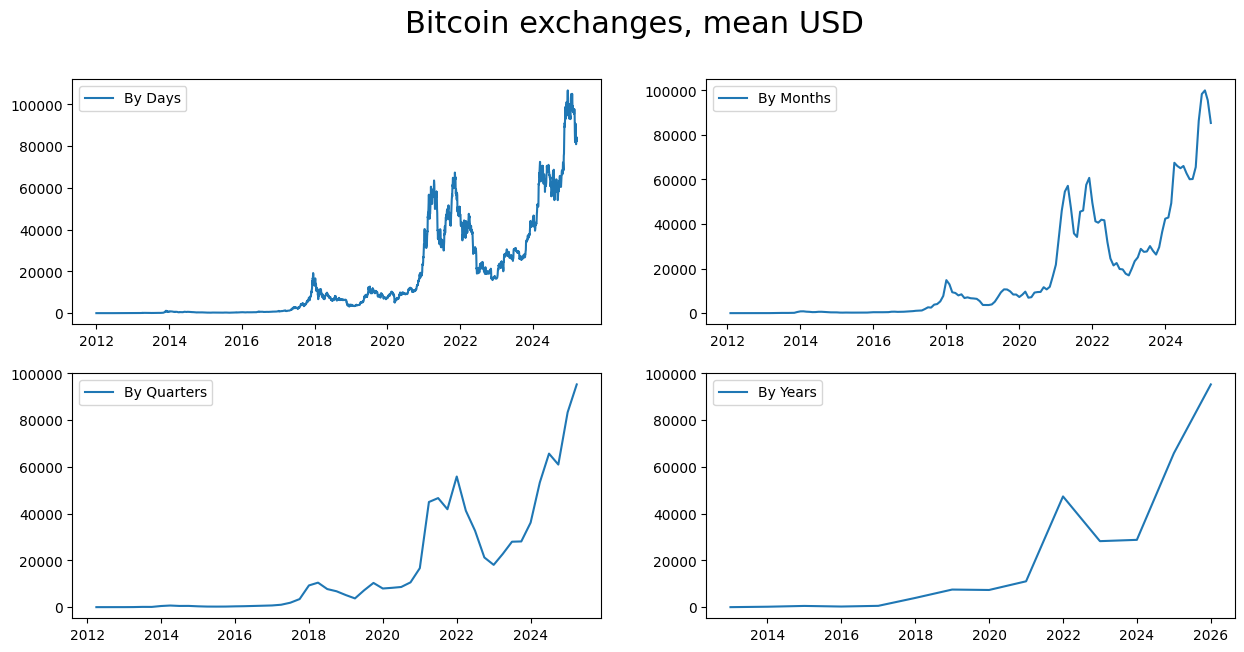

In [10]:
# PLOTS
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df_d.Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_m.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_y.Close, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()


Dickey–Fuller test: p=0.992287


<Figure size 1500x700 with 0 Axes>

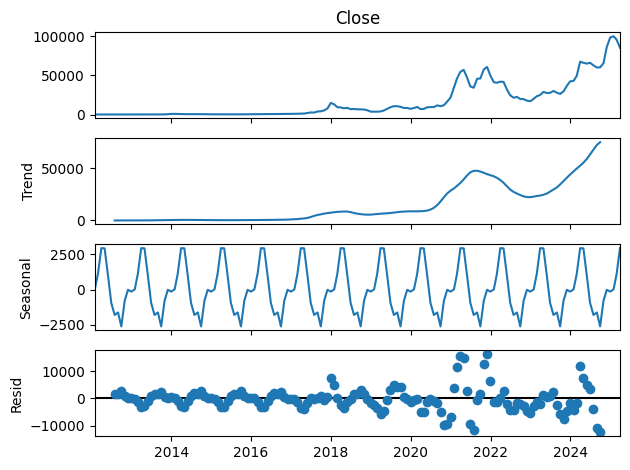

In [11]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_m.Close).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_m.Close)[1])
plt.show()

In [12]:
df_m['Weighted_Price_box'], lmbda = stats.boxcox(df_m.Close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_m.Close)[1])

Dickey–Fuller test: p=0.992287


In [13]:
# Seasonal differentiation
df_m['prices_box_diff'] = df_m.Weighted_Price_box - df_m.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_m.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.023692


Dickey–Fuller test: p=0.000000


<Figure size 1500x700 with 0 Axes>

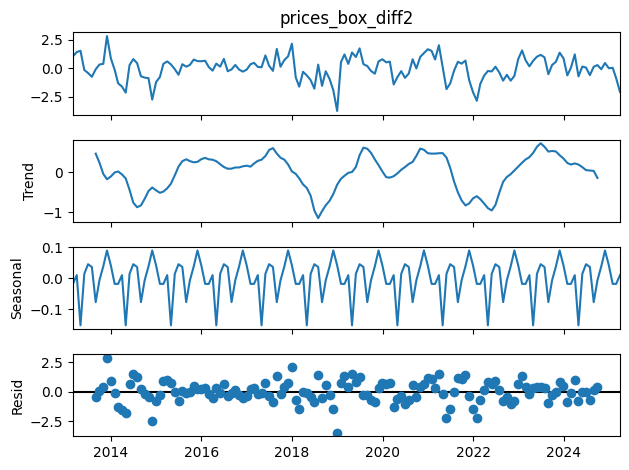

In [14]:
# Regular differentiation
df_m['prices_box_diff2'] = df_m.prices_box_diff - df_m.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_m.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_m.prices_box_diff2[13:])[1])

plt.show()

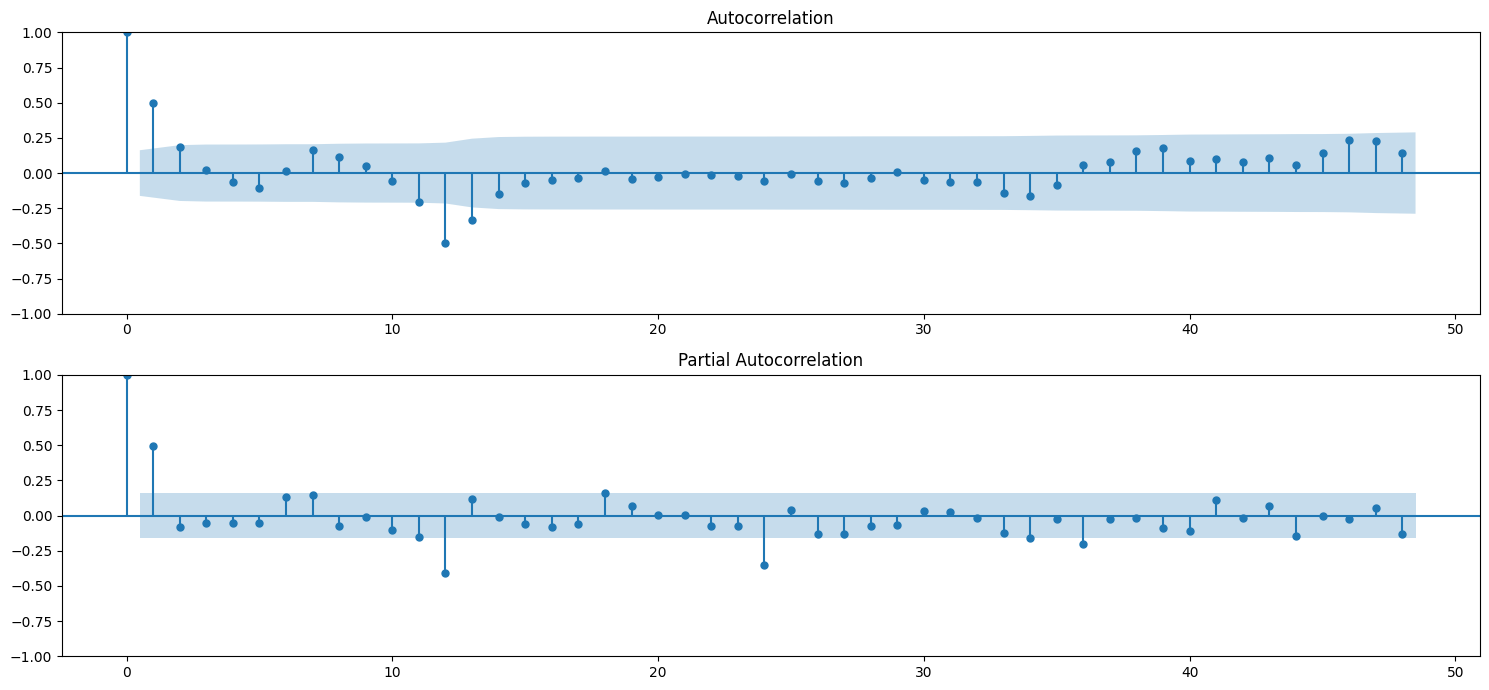

In [15]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_m.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_m.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [16]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_m.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [17]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  303.841007
7   (0, 1, 0, 1)  304.015911
37  (2, 0, 0, 1)  304.222500
25  (1, 1, 0, 1)  304.282852
13  (0, 2, 0, 1)  304.491191
                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                  159
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -148.921
Date:                              Wed, 07 May 2025   AIC                            303.841
Time:                                      18:04:40   BIC                            312.792
Sample:                                  01-31-2012   HQIC                           307.478
                                       - 03-31-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Dickey–Fuller test:: p=0.000000


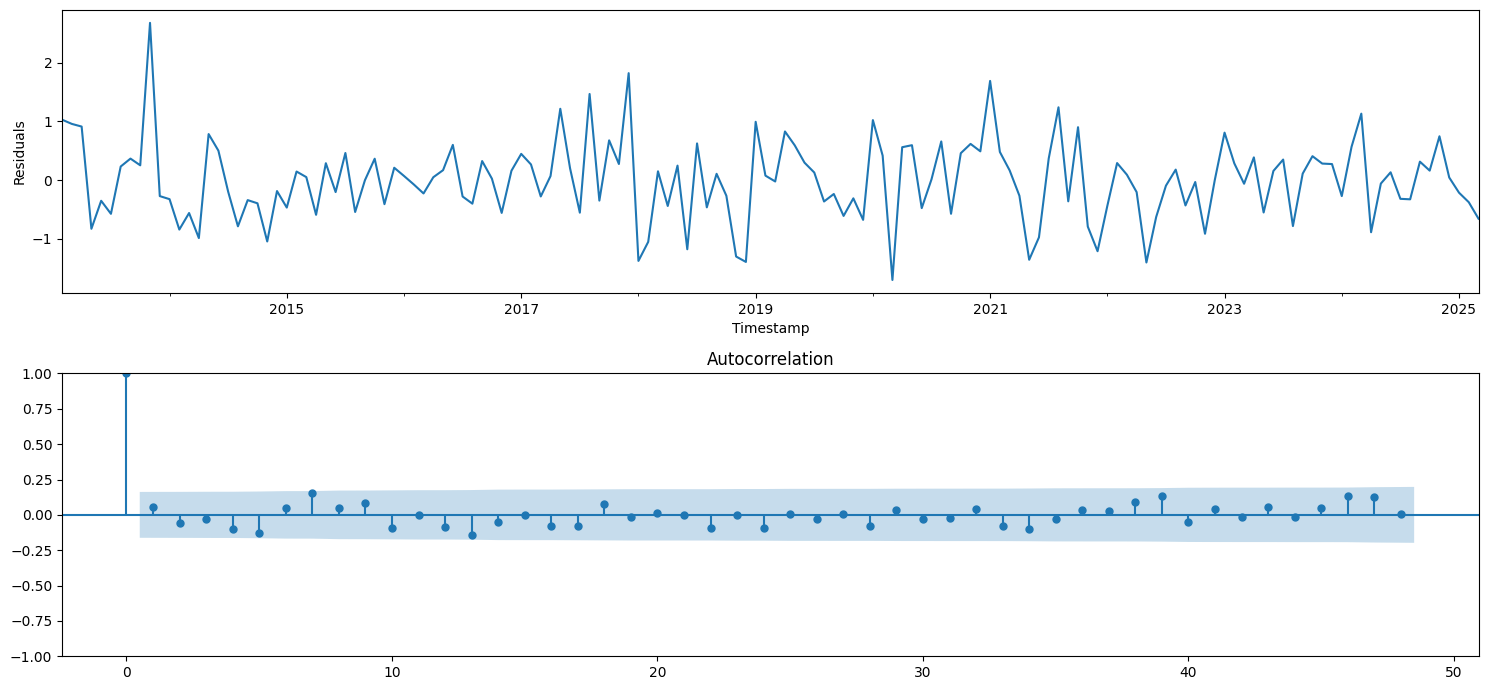

In [18]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [19]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

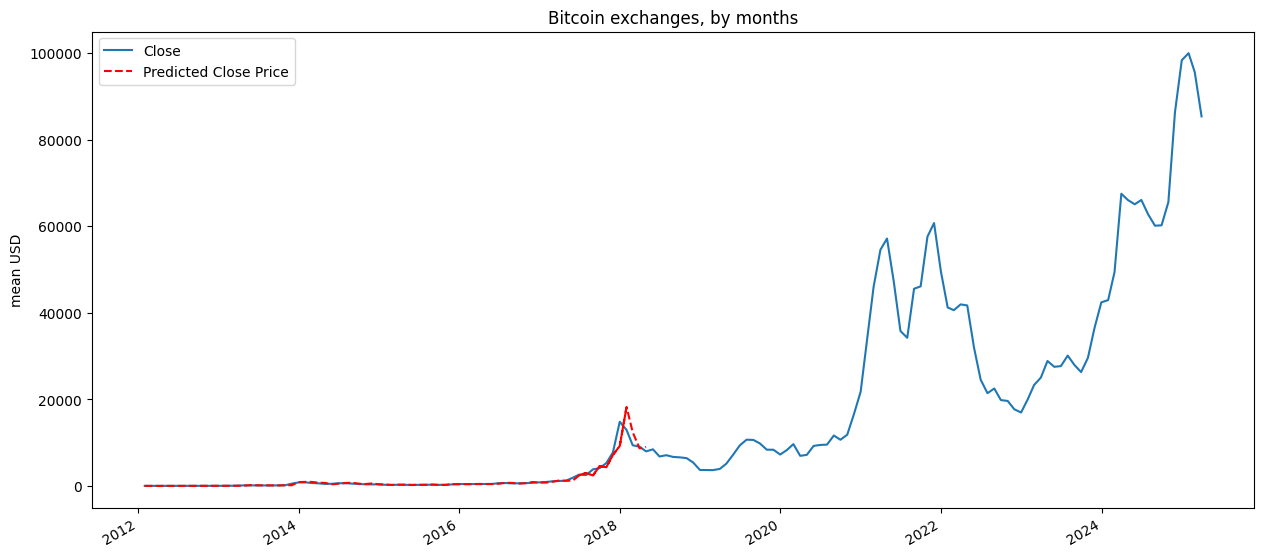

In [20]:
# Prediction
df_month2 = df_m[['Close']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 1, 28)]
future = pd.DataFrame(index=date_list, columns= df_m.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.Close.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

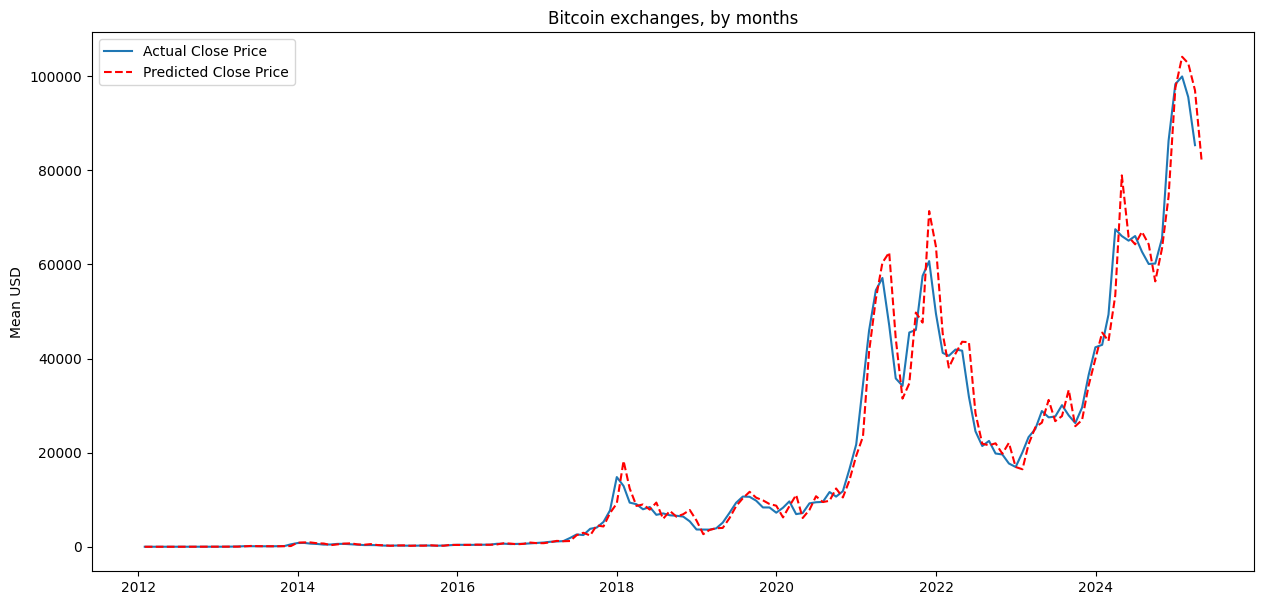

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.special import inv_boxcox

# Основний датасет
df_month2 = df_m[['Close']].copy()

# Додаємо майбутній місяць
future_dates = pd.date_range(start=df_month2.index[-1], periods=2, freq='M')[1:]  # Тільки 1 місяць вперед
future = pd.DataFrame(index=future_dates, columns=df_month2.columns)

# Об'єднуємо історичні дані та майбутні дати
df_month2 = pd.concat([df_month2, future])

# Прогнозуємо з самого початку датасету
df_month2['forecast'] = inv_boxcox(best_model.predict(start=0, end=len(df_month2)-1), lmbda)

# Візуалізація
plt.figure(figsize=(15,7))
plt.plot(df_month2.index, df_month2['Close'], label='Actual Close Price')
plt.plot(df_month2.index, df_month2['forecast'], 'r--', label='Predicted Close Price')  # Пунктирна червона лінія
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('Mean USD')
plt.show()


In [22]:
df_m

,Open,High,Low,Close,Volume,Weighted_Price_box,prices_box_diff,prices_box_diff2
Timestamp,,,,,,,,
2012-01-31,6.253758,6.253799,6.253711,6.253767,0.045693,2.096890,NaN,NaN
2012-02-29,5.234570,5.234590,5.234526,5.234547,0.114023,1.868388,NaN,NaN
2012-03-31,4.954475,4.954491,4.954437,4.954453,0.202725,1.798926,NaN,NaN
2012-04-30,4.980317,4.980339,4.980292,4.980315,0.381578,1.805478,NaN,NaN
2012-05-31,5.041776,5.041785,5.041760,5.041769,0.414877,1.820933,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-11-30,86294.553102,86323.821852,86264.832037,86294.576088,2.526375,28.629800,4.137170,0.446185
2024-12-31,98323.278203,98347.921349,98298.136402,98323.089158,1.436622,29.302637,4.124250,-0.012920
2025-01-31,99948.949261,99978.063396,99918.727755,99948.376523,1.215462,29.388066,4.153078,0.028828


Mean Absolute Error (MAE): 1952.08
Mean Squared Error (MSE): 14272466.75
Root Mean Squared Error (RMSE): 3777.89
Mean Absolute Percentage Error (MAPE): 16.47%


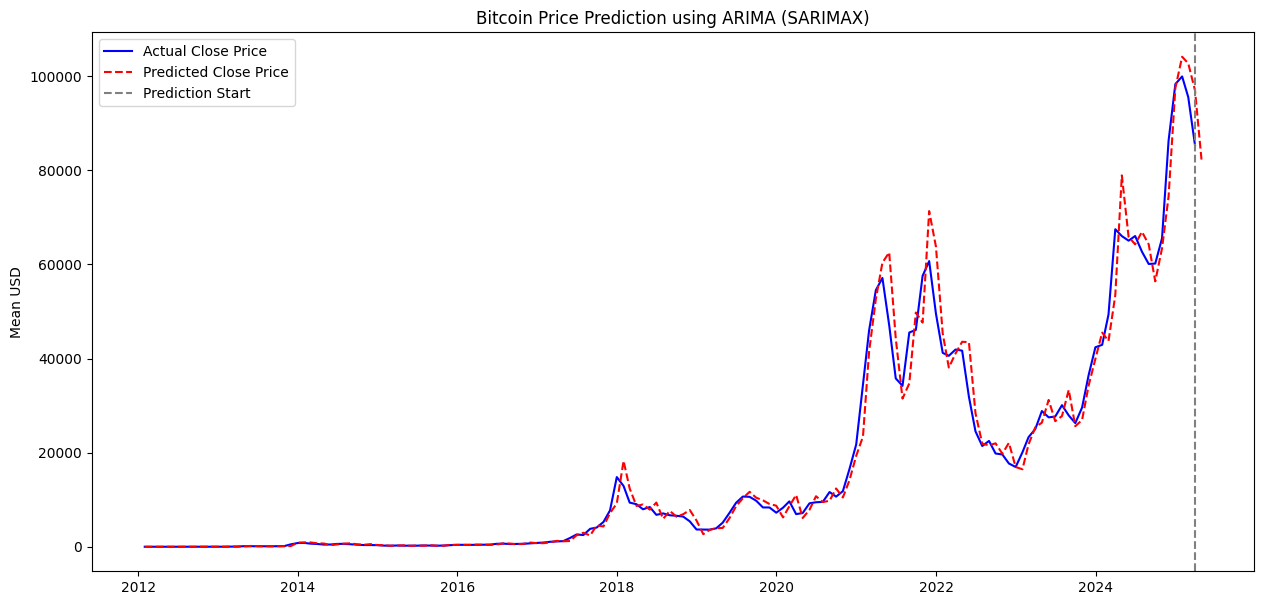

In [ ]:
# TODO: Here more model evaluations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.special import inv_boxcox
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Основний датасет
df_month2 = df_m[['Close']].copy()

# Додаємо майбутній місяць
future_dates = pd.date_range(start=df_month2.index[-1], periods=2, freq='M')[1:]  # Прогноз на 1 місяць вперед
future = pd.DataFrame(index=future_dates, columns=df_month2.columns)

# Об'єднуємо історичні дані та майбутні дати
df_month2 = pd.concat([df_month2, future])

# Прогнозування моделі ARIMA (SARIMAX)
df_month2['forecast'] = inv_boxcox(best_model.predict(start=0, end=len(df_month2)-1), lmbda)

# Видаляємо майбутній місяць для оцінки метрик
actual = df_m['Close'].iloc[-len(df_month2)+1:]  # Реальні значення для тестового періоду
predicted = df_month2['forecast'].iloc[:-1]  # Прогноз (без останнього місяця, бо немає фактичного значення)

# Оцінка моделі
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100  # У відсотках

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Візуалізація
plt.figure(figsize=(15,7))
plt.plot(df_month2.index, df_month2['Close'], label='Actual Close Price', color='blue')
plt.plot(df_month2.index, df_month2['forecast'], 'r--', label='Predicted Close Price')  # Пунктирна червона лінія
plt.axvline(x=df_m.index[-1], color='gray', linestyle='--', label='Prediction Start')  # Лінія розділу тренувальних і тестових даних
plt.legend()
plt.title('Bitcoin Price Prediction using ARIMA (SARIMAX)')
plt.ylabel('Mean USD')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.special import inv_boxcox
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Основний датасет
df_month2 = df_m[['Close']].copy()

# Додаємо майбутній місяць
future_dates = pd.date_range(start=df_month2.index[-1], periods=2, freq='M')[1:]  # Прогноз на 1 місяць вперед
future = pd.DataFrame(index=future_dates, columns=df_month2.columns)

# Об'єднуємо історичні дані та майбутні дати
df_month2 = pd.concat([df_month2, future])

# Прогнозування моделі ARIMA (SARIMAX)
df_month2['forecast'] = inv_boxcox(best_model.predict(start=0, end=len(df_month2)-1), lmbda)

# Видаляємо майбутній місяць для оцінки метрик
actual = df_m['Close'].iloc[-len(df_month2)+1:].values.reshape(-1, 1)  # Реальні значення
predicted = df_month2['forecast'].iloc[:-1].values.reshape(-1, 1)  # Прогноз (без останнього місяця)

# Масштабуємо перед оцінкою
scaler = MinMaxScaler(feature_range=(0, 1))
actual_scaled = scaler.fit_transform(actual)
predicted_scaled = scaler.transform(predicted)

# Оцінка моделі
mae = mean_absolute_error(actual_scaled, predicted_scaled)
mse = mean_squared_error(actual_scaled, predicted_scaled)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_scaled - predicted_scaled) / actual_scaled)) * 100  # У відсотках

# Вивід результатів
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Візуалізація
plt.figure(figsize=(15,7))
plt.plot(df_m.index, df_m['Close'], label='Actual Close Price', color='blue')
plt.plot(df_month2.index, df_month2['forecast'], 'r--', label='Predicted Close Price')  # Пунктирна червона лінія
plt.axvline(x=df_m.index[-1], color='gray', linestyle='--', label='Prediction Start')  # Лінія розділу
plt.legend()
plt.title('Bitcoin Price Prediction using ARIMA (SARIMAX)')
plt.ylabel('Mean USD')
plt.show()


LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization # type: ignore
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('btcusd_1-min_data.csv')

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,6944800.0,1.533756e+09,1.202875e+08,1.325412e+09,1.429584e+09,1.533756e+09,1.637928e+09,1.742170e+09
Open,6944800.0,1.675104e+04,2.321404e+04,3.800000e+00,4.214200e+02,6.497595e+03,2.674500e+04,1.091110e+05
High,6944800.0,1.675786e+04,2.322205e+04,3.800000e+00,4.215200e+02,6.499950e+03,2.675000e+04,1.093560e+05
Low,6944800.0,1.674401e+04,2.320586e+04,3.800000e+00,4.212700e+02,6.494990e+03,2.674000e+04,1.087940e+05
Close,6944800.0,1.675105e+04,2.321406e+04,3.800000e+00,4.214200e+02,6.497620e+03,2.674500e+04,1.090360e+05
Volume,6944800.0,5.342342e+00,2.262043e+01,0.000000e+00,1.817584e-02,4.780328e-01,3.069331e+00,5.853852e+03


In [ ]:
df

In [ ]:
df.dtypes

print(df.head(10))

print(df.columns)

In [ ]:
# Convert Timestamp column from Unix timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Drop the datetime column as it seems redundant
df.drop(columns=['datetime'], inplace=True)

# Set Timestamp as index
df.set_index('Timestamp', inplace=True)

# Now resample will work (using 'M' or 'ME' as recommended)
df = df.resample('ME').mean()

# Verify the index
print(df.index)  # Should be DatetimeIndex

# Calculate average price
df['price'] = (df['High'] + df['Low']) / 2

# Remove unnecessary columns
# df.drop(['Open', 'Close', 'Volume', 'High', 'Low'], axis=1, inplace=True)

# Normalize
target_scaler = MinMaxScaler()
df['price'] = target_scaler.fit_transform(df[['price']])

# Prepare training data
D = 50  # Number of previous points for prediction
X_l, y_l = [], []
for i in range(len(df) - D - 1):
    X_l.append(df.iloc[i:i+D].values)
    y_l.append(df.iloc[i+D].values)
X, y = np.array(X_l), np.array(y_l)

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

In [ ]:
df.tail(100)

# Побудова LSTM моделі
# model = Sequential([
#     LSTM(128, return_sequences=True, input_shape=(D, X.shape[2])),
#     Dropout(0.3),
#     BatchNormalization(),
#     LSTM(64, return_sequences=False),
#     Dropout(0.3),
#     BatchNormalization(),
#     Dense(32, activation='relu'),
#     Dense(1)
# ])


In [ ]:
# Best model for LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler

# Додавання більшої кількості ознак
df['month'] = df.index.month  # Додаємо інформацію про місяць
df['year'] = df.index.year  # Додаємо інформацію про рік
df['price_diff'] = df['price'].diff()  # Додаємо різницю між цінами (тренд)
df['rolling_mean'] = df['price'].rolling(window=3).mean()  # Середнє за 3 місяці
df.dropna(inplace=True)  # Видаляємо NaN після створення фіч

# Масштабуємо дані
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['price', 'month', 'year', 'price_diff', 'rolling_mean']])
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(df[['price']])

# Формуємо послідовності для LSTM
D = 12  # Використовуємо 12 місяців як вхідні дані
X, y = [], []

for i in range(D, len(df) - 1):  # -1, бо прогнозуємо лише 1 місяць вперед
    X.append(scaled_features[i-D:i])
    y.append(scaled_target[i])

X, y = np.array(X), np.array(y)

# Перетворюємо X у правильний формат
X_full = X.reshape(X.shape[0], X.shape[1], X.shape[2])

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(D, X.shape[2])),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компіляція
model.compile(optimizer='adam', loss='huber')

# Навчання моделі
history = model.fit(X_full, y, epochs=100, batch_size=16, verbose=2)

# Прогноз для всього датасету
y_pred = model.predict(X_full)
y_pred = target_scaler.inverse_transform(y_pred)

# Формуємо фінальний DataFrame з прогнозом
results_df = df.iloc[D:D+len(y_pred)].copy()
results_df['Predicted Price'] = y_pred

# Прогноз лише на наступний місяць
last_12_months = scaled_features[-D:].reshape(1, D, X.shape[2])  # Останні 12 місяців
next_month_pred = model.predict(last_12_months)  # Прогноз
next_month_pred = target_scaler.inverse_transform(next_month_pred)[0][0]  # Відновлення масштабу

# Графік
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['price'], label='Actual Price', color='blue')
plt.plot(results_df.index, results_df['Predicted Price'], 'r--', label='Predicted Price')
plt.scatter(df.index[-1] + pd.DateOffset(months=1), next_month_pred, color='red', label='Next Month Prediction')  # Окремий прогноз
plt.title('Bitcoin Price Prediction (Next Month)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

mse = mean_squared_error(results_df['price'], results_df['Predicted Price'])
mae = mean_absolute_error(results_df['price'], results_df['Predicted Price'])
rmse = np.sqrt(mean_squared_error(results_df['price'], results_df['Predicted Price']))
mape = np.mean(np.abs((results_df['price'] - results_df['Predicted Price']) / results_df['price'])) * 100

# Вивід результатів
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Обробка даних
df['log_price'] = np.log1p(df['price'])  # Логарифм ціни для стабільності
df['month'] = df.index.month
df['year'] = df.index.year
df['price_diff'] = df['log_price'].diff()
df['rolling_mean'] = df['log_price'].rolling(window=6).mean()  # Вікно 6 місяців

df.dropna(inplace=True)

# Масштабування
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['log_price', 'month', 'year', 'price_diff', 'rolling_mean']])
target_scaler = StandardScaler()
scaled_target = target_scaler.fit_transform(df[['log_price']])

# Формуємо послідовності
D = 12  # 12 місяців як вхідні дані
X, y = [], []

for i in range(D, len(df) - 1):
    X.append(scaled_features[i-D:i])
    y.append(scaled_target[i])

X, y = np.array(X), np.array(y)

# Модель LSTM
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(D, X.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='huber')

# Навчання з ранньою зупинкою
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X, y, epochs=200, batch_size=32, verbose=2, callbacks=[early_stop])

# Прогноз
y_pred = model.predict(X)
y_pred = target_scaler.inverse_transform(y_pred)
y_pred = np.expm1(y_pred)  # Повертаємо назад у лінійну шкалу

# Формуємо фінальний DataFrame з прогнозом
results_df = df.iloc[D:D+len(y_pred)].copy()
results_df['Predicted Price'] = y_pred

# Прогноз на наступний місяць
last_12_months = scaled_features[-D:].reshape(1, D, X.shape[2])
next_month_pred = model.predict(last_12_months)
next_month_pred = target_scaler.inverse_transform(next_month_pred)
next_month_pred = np.expm1(next_month_pred)[0][0]

# Графік
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['price'], label='Actual Price', color='blue')
plt.plot(results_df.index, results_df['Predicted Price'], 'r--', label='Predicted Price')
plt.scatter(df.index[-1] + pd.DateOffset(months=1), next_month_pred, color='red', label='Next Month Prediction')
plt.title('Bitcoin Price Prediction (Next Month)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Метрики
mse = mean_squared_error(results_df['price'], results_df['Predicted Price'])
mae = mean_absolute_error(results_df['price'], results_df['Predicted Price'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((results_df['price'] - results_df['Predicted Price']) / results_df['price'])) * 100

# Вивід результатів
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('btcusd_1-min_data.csv')

df.describe().T

In [ ]:
df.dtypes

print(df.head(10))

print(df.columns)

In [ ]:
# Convert Timestamp column from Unix timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Drop the datetime column as it seems redundant
df.drop(columns=['datetime'], inplace=True)

# Set Timestamp as index
df.set_index('Timestamp', inplace=True)

# Now resample will work (using 'M' or 'ME' as recommended)
df = df.resample('ME').mean()

# Verify the index
print(df.index)  # Should be DatetimeIndex

# Calculate average price
df['price'] = (df['High'] + df['Low']) / 2

# Remove unnecessary columns
# df.drop(['Open', 'Close', 'Volume', 'High', 'Low'], axis=1, inplace=True)

# Normalize
target_scaler = MinMaxScaler()
df['price'] = target_scaler.fit_transform(df[['price']])

# Prepare training data
D = 50  # Number of previous points for prediction
X_l, y_l = [], []
for i in range(len(df) - D - 1):
    X_l.append(df.iloc[i:i+D].values)
    y_l.append(df.iloc[i+D].values)
X, y = np.array(X_l), np.array(y_l)

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler

# Додавання більшої кількості ознак
df['month'] = df.index.month  # Додаємо інформацію про місяць
df['year'] = df.index.year  # Додаємо інформацію про рік
df['price_diff'] = df['price'].diff()  # Додаємо різницю між цінами (тренд)
df['rolling_mean'] = df['price'].rolling(window=3).mean()  # Середнє за 3 місяці
df.dropna(inplace=True)  # Видаляємо NaN після створення фіч

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df[['Open', 'year', 'High', 'Low', 'Close', 'Volume', 'month', 'price_diff', 'rolling_mean']]
y = df['price']

# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Створення моделі RandomForest
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Навчання моделі
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка якості моделі
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Price', color='red')
plt.title('Bitcoin Price Prediction using RandomForest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Додавання фіч для прогнозування на 1 місяць вперед
df['price_next_month'] = df['price'].shift(-1)  # Ціна наступного місяця

# Видаляємо останній рядок, де немає наступної ціни
df.dropna(inplace=True)

# Підготовка фіч та цільової змінної для прогнозування на 1 місяць вперед
X = df[['Open', 'year', 'High', 'Low', 'Close', 'Volume', 'month', 'price_diff', 'rolling_mean']]
y = df['price_next_month']  # Прогнозуємо ціну наступного місяця

# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Створення моделі RandomForest
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Навчання моделі
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка якості моделі
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Price Next Month', color='blue')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Price Next Month', color='red')
plt.title('Bitcoin Price Prediction for Next Month using RandomForest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Припустимо, що df вже містить всі необхідні дані до поточної дати (2025-03-31)

# Додавання фіч для прогнозування на 1 місяць вперед
df['price_diff'] = df['price'].diff()  # Різниця між цінами
df['rolling_mean'] = df['price'].rolling(window=3).mean()  # Середнє за 3 місяці
df.dropna(inplace=True)  # Видаляємо NaN після створення фіч

# Додавання фіч для прогнозування наступної ціни
df['price_next_month'] = df['price'].shift(-1)  # Ціна наступного місяця
df.dropna(inplace=True)  # Видаляємо NaN, якщо є (наприклад, для останнього рядка)

# Підготовка фіч та цільової змінної для прогнозування на 1 місяць вперед
X = df[['Open', 'year', 'High', 'Low', 'Close', 'Volume', 'month', 'price_diff', 'rolling_mean']]
y = df['price_next_month']  # Цільова змінна — ціна наступного місяця

# Використовуємо всі дані до 2025-03-31 для навчання
X_train = X[X.index <= '2025-03-31']
y_train = y[y.index <= '2025-03-31']

# Створення моделі RandomForest
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Навчання моделі
model.fit(X_train, y_train)

# Прогнозування на тестових даних (останній доступний місяць)
latest_data = X.iloc[-1].values.reshape(1, -1)  # Використовуємо останній рядок для прогнозу
next_month_prediction = model.predict(latest_data)

# Виведення результату прогнозу на наступний місяць
print(f"Predicted Bitcoin Price for 2025-04-30: {next_month_prediction[0]}")

# Візуалізація результатів (для тренувальних даних та прогнозів)
y_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Actual Price Next Month', color='blue')
plt.plot(df.index, y_pred, label='Predicted Price', color='red')
plt.title('Bitcoin Price Prediction for Next Month using RandomForest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
X_train

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Оцінка якості моделі на тренувальних даних
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_train, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

